# LÀM QUEN VỚI ẢNH SỐ TRONG COMPUTER VISION

In [ ]:
import cv as cv
import matplotlib.pyplot as plt

In [ ]:
# Kiểm tra OpenCV đọc ảnh và hiển thị kích thước
img = cv.imread('lenna.png')  # đọc ảnh bằng OpenCV
print('type:', type(img))
print('shape:', img.shape)     # (height, width, channels) nếu ảnh màu
print('dtype:', img.dtype)
# In từng chiều
h, w = img.shape[:2]
print('height:', h, 'width:', w)

type: <class 'numpy.ndarray'>
shape: (512, 512, 3)
dtype: uint8
height: 512 width: 512


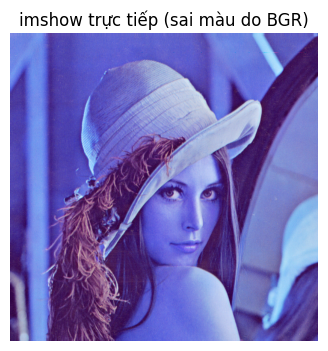

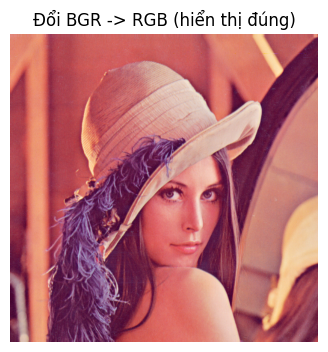

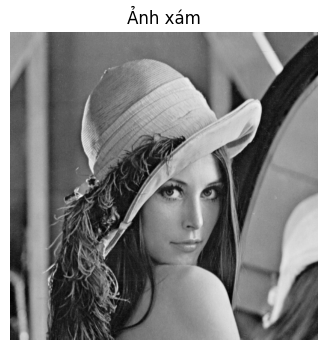

In [4]:
# Hiển thị ảnh dùng plt.imshow và nhận xét; hai cách sửa để hiển thị đúng
# Hiển thị trực tiếp bằng matplotlib (sai màu vì matplotlib chờ RGB)
plt.figure(figsize=(6,4))
plt.title('imshow trực tiếp (sai màu do BGR)')
plt.imshow(img)   # sẽ hiển thị màu sai
plt.axis('off')
plt.show()

# Cách 1: đảo kênh B và R (convert sang RGB)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,4))
plt.title('Đổi BGR -> RGB (hiển thị đúng)')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Cách 2: hiển thị ảnh xám
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(6,4))
plt.title('Ảnh xám')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

Nhận xét: khi dùng cv.imread, OpenCV lưu theo BGR nên plt.imshow sẽ đổi màu (thường đỏ/xanh bị đảo). Sửa bằng cvtColor sang RGB hoặc chuyển sang grayscale.

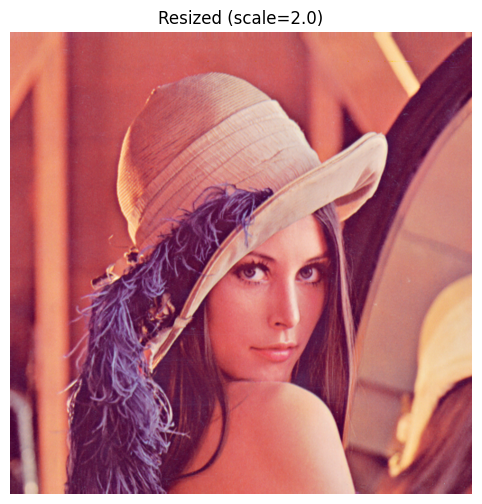

In [6]:
# Phóng to ảnh (resize) với interpolation
# Tăng kích thước theo hệ số
scale = 2.0
new_w = int(img.shape[1] * scale)
new_h = int(img.shape[0] * scale)
resized = cv.resize(img, (new_w, new_h), interpolation=cv.INTER_CUBIC)
# Hiển thị (chuyển sang RGB để plt đúng màu)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Resized (scale=2.0)')
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

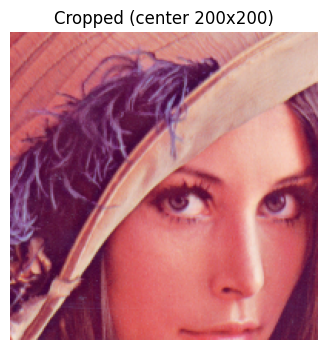

In [7]:
h, w = img.shape[:2]
# crop vùng trung tâm kích thước 200x200
crop_w, crop_h = 200, 200
cx, cy = w//2, h//2
x1 = max(0, cx - crop_w//2)
y1 = max(0, cy - crop_h//2)
x2 = min(w, x1 + crop_w)
y2 = min(h, y1 + crop_h)
cropped = img[y1:y2, x1:x2]
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Cropped (center 200x200)')
plt.imshow(cv.cvtColor(cropped, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

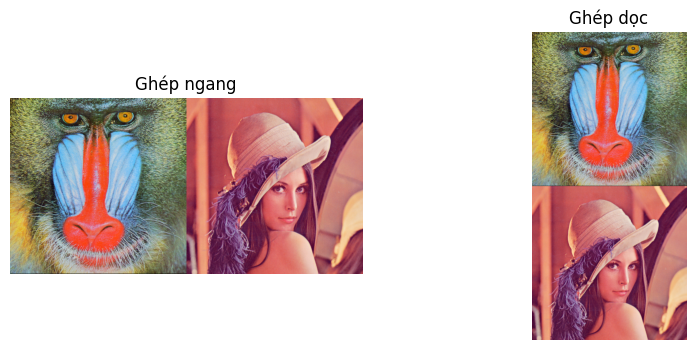

In [8]:
import numpy as np

a = cv.imread('baboon.png')
b = cv.imread('lenna.png')

# Chuẩn hóa kích thước: đưa cả hai về cùng chiều cao để ghép ngang
h = min(a.shape[0], b.shape[0])
# resize tỉ lệ
def resize_to_height(img, target_h):
    h0, w0 = img.shape[:2]
    scale = target_h / h0
    return cv.resize(img, (int(w0*scale), target_h), interpolation=cv.INTER_AREA)

a_r = resize_to_height(a, h)
b_r = resize_to_height(b, h)

# Ghép ngang (side by side)
concat_horiz = np.hstack((a_r, b_r))

# Ghép dọc: chuẩn hóa chiều rộng về cùng 1 giá trị
w = min(a.shape[1], b.shape[1])
def resize_to_width(img, target_w):
    h0, w0 = img.shape[:2]
    scale = target_w / w0
    return cv.resize(img, (target_w, int(h0*scale)), interpolation=cv.INTER_AREA)

a_rw = resize_to_width(a, w)
b_rw = resize_to_width(b, w)
concat_vert = np.vstack((a_rw, b_rw))

# Hiển thị kết quả (chuyển sang RGB)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title('Ghép ngang'); plt.imshow(cv.cvtColor(concat_horiz, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(1,2,2); plt.title('Ghép dọc'); plt.imshow(cv.cvtColor(concat_vert, cv.COLOR_BGR2RGB)); plt.axis('off')
plt.show()